In [1]:
import os
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\m

In [2]:
energy_floating = pd.read_csv('data/energy_floating_sunlight.csv') # 일조, 일사량 추가 된 데이터
energy_warehouse = pd.read_csv('data/energy_warehouse_sunlight.csv') # 일조, 일사량 추가 된 데이터
energy_dangjin = pd.read_csv('data/energy_dangjin_sunlight.csv') # 일조, 일사량 추가 된 데이터
energy_ulsan = pd.read_csv('data/energy_ulsan.csv')

In [3]:
model_path = 'model'
filename = []
filename.append(os.path.join(model_path, 'floating_checkpoint.h5'))
filename.append(os.path.join(model_path, 'warehouse_checkpoint.h5'))
filename.append(os.path.join(model_path, 'dangjin_checkpoint.h5'))
filename.append(os.path.join(model_path, 'ulsan_checkpoint.h5'))

In [4]:
def make_dataset(data, label, window_size=24):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [5]:
def root_mean_squared_error (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [6]:
df = energy_floating.copy()
df
# df['dangjin_floating'].isnull().sum()

,time,dangjin_floating,capacity,time_generation,Temperature,Humidity,WindSpeed,WindDirection,Cloud,일조(hr),일사(MJ/m2)
0,2018-03-02 00:00:00,0.0,1000.0,0.0,-2.000000,55.000000,6.7,336.000000,1.0,0.0,0.0
1,2018-03-02 01:00:00,0.0,1000.0,0.0,-2.666667,55.000000,6.3,337.000000,1.0,0.0,0.0
2,2018-03-02 02:00:00,0.0,1000.0,0.0,-3.333333,55.000000,5.9,338.000000,1.0,0.0,0.0
3,2018-03-02 03:00:00,0.0,1000.0,0.0,-4.000000,55.000000,5.5,339.000000,1.0,0.0,0.0
4,2018-03-02 04:00:00,0.0,1000.0,0.0,-4.333333,56.666667,5.1,340.666667,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
26299,2021-03-01 19:00:00,NaN,NaN,NaN,6.333333,85.000000,6.3,31.666667,4.0,0.0,0.0
26300,2021-03-01 20:00:00,NaN,NaN,NaN,5.666667,85.000000,6.1,29.333333,4.0,0.0,0.0
26301,2021-03-01 21:00:00,NaN,NaN,NaN,5.000000,85.000000,5.9,27.000000,4.0,0.0,0.0
26302,2021-03-01 22:00:00,NaN,NaN,NaN,5.000000,85.000000,5.9,27.000000,4.0,0.0,0.0


In [7]:
df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud', '일조(hr)', '일사(MJ/m2)']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled['Generation'] = df['time_generation']
scale_cols.append('Generation')
df_scaled.columns = scale_cols

In [8]:
df_scaled[df_scaled['일조(hr)'] > 0]

,Temperature,Humidity,WindSpeed,WindDirection,Cloud,일조(hr),일사(MJ/m2),Generation
8,0.224490,0.490196,0.095732,0.957407,0.000000,0.5,0.041237,0.011
9,0.244898,0.470588,0.069204,0.958333,0.000000,1.0,0.189691,0.134
10,0.265306,0.431373,0.055363,0.875926,0.000000,1.0,0.336082,0.363
11,0.285714,0.392157,0.041522,0.793519,0.000000,1.0,0.465979,0.563
12,0.306122,0.352941,0.027682,0.711111,0.000000,1.0,0.554639,0.691
...,...,...,...,...,...,...,...,...
26264,0.340136,0.686275,0.118800,0.349074,0.222222,0.3,0.024742,NaN
26265,0.367347,0.647059,0.124567,0.372222,0.000000,1.0,0.144330,NaN
26268,0.510204,0.294118,0.055363,0.238889,0.000000,0.1,0.206186,NaN
26269,0.523810,0.294118,0.064591,0.466667,0.222222,0.4,0.364948,NaN


In [9]:
feature_cols = ['Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud', '일조(hr)', '일사(MJ/m2)']
label_cols = ['Generation']

window_size = 24
n = len(df_scaled)

train = df_scaled[:int(n*0.8)]
train.dropna(axis=0, inplace=True)
test = df_scaled[int(n*0.8):int(-(24*29))]
test.dropna(axis=0, inplace=True)
pred_input = df_scaled[int(-(24*29)):]

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [10]:
train_feature, train_label = train[feature_cols], train[label_cols]
train_feature, train_label = make_dataset(train_feature, train_label, window_size)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

test_feature, test_label = test[feature_cols], test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, window_size)

pred_feature, pred_label = pred_input[feature_cols], pred_input[label_cols]
pred_feature, pred_label = make_dataset(pred_feature, pred_label, window_size)

x_train.shape, x_valid.shape, test_feature.shape, pred_feature.shape

((16796, 24, 7), (4199, 24, 7), (4541, 24, 7), (672, 24, 7))

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM
from tensorflow.keras import backend as K

epoch = 50

In [12]:
model_0 = Sequential()
model_0.add(LSTM(24, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               kernel_regularizer=tf.keras.regularizers.l2(0.001),
               return_sequences=False)
          )

# model.add(Dense(1))
# model.add(LeakyReLU(alpha=0.05))
model_0.add(Dense(1, activation='relu'))
model_0.compile(loss='mean_squared_error', optimizer='adam')
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24)                3072      
_________________________________________________________________
dense (Dense)                (None, 1)                 25        
Total params: 3,097
Trainable params: 3,097
Non-trainable params: 0
_________________________________________________________________


In [13]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint(filename[0], monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history_0 = model_0.fit(x_train, y_train, epochs=epoch,
                                      validation_data=(x_valid, y_valid), 
                                      callbacks=[early_stop, checkpoint])

Epoch 1/50
525/525 [==============================] - 5s 7ms/step - loss: 0.0277 - val_loss: 0.0102

Epoch 00001: val_loss improved from inf to 0.01017, saving model to model\floating_checkpoint.h5
Epoch 2/50
525/525 [==============================] - 3s 6ms/step - loss: 0.0080 - val_loss: 0.0065

Epoch 00002: val_loss improved from 0.01017 to 0.00655, saving model to model\floating_checkpoint.h5
Epoch 3/50
525/525 [==============================] - 3s 6ms/step - loss: 0.0063 - val_loss: 0.0058

Epoch 00003: val_loss improved from 0.00655 to 0.00584, saving model to model\floating_checkpoint.h5
Epoch 4/50
525/525 [==============================] - 3s 6ms/step - loss: 0.0059 - val_loss: 0.0055

Epoch 00004: val_loss improved from 0.00584 to 0.00546, saving model to model\floating_checkpoint.h5
Epoch 5/50
525/525 [==============================] - 3s 6ms/step - loss: 0.0057 - val_loss: 0.0053

Epoch 00005: val_loss improved from 0.00546 to 0.00532, saving model to model\floating_checkpoi

In [14]:
floating_pred = model_0.predict(pred_feature)

In [15]:
floating_pred

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00449586],
       [0.05971511],
       [0.11081319],
       [0.22996642],
       [0.36404353],
       [0.469302  ],
       [0.51614535],
       [0.50494975],
       [0.44221014],
       [0.32615823],
       [0.13527164],
       [0.00602565],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.09557255],
       [0.27918327],
       [0.40140742],
       [0.47916025],
       [0.47062385],
       [0.36748827],
       [0.23093124],
       [0.12033362],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [16]:
df = energy_warehouse.copy()
df.head(24)

,time,dangjin_warehouse,capacity,time_generation,Temperature,Humidity,WindSpeed,WindDirection,Cloud,일조(hr),일사(MJ/m2)
0,2018-03-02 00:00:00,0.0,700.0,0.000000,-2.000000,55.000000,6.700000,336.000000,1.000000,0.0,0.00
1,2018-03-02 01:00:00,0.0,700.0,0.000000,-2.666667,55.000000,6.300000,337.000000,1.000000,0.0,0.00
2,2018-03-02 02:00:00,0.0,700.0,0.000000,-3.333333,55.000000,5.900000,338.000000,1.000000,0.0,0.00
3,2018-03-02 03:00:00,0.0,700.0,0.000000,-4.000000,55.000000,5.500000,339.000000,1.000000,0.0,0.00
4,2018-03-02 04:00:00,0.0,700.0,0.000000,-4.333333,56.666667,5.100000,340.666667,1.000000,0.0,0.00
5,2018-03-02 05:00:00,0.0,700.0,0.000000,-4.666667,58.333333,4.700000,342.333333,1.000000,0.0,0.00
6,2018-03-02 06:00:00,0.0,700.0,0.000000,-5.000000,60.000000,4.300000,344.000000,1.000000,0.0,0.00
7,2018-03-02 07:00:00,0.0,700.0,0.000000,-4.000000,58.333333,3.533333,344.333333,1.000000,0.0,0.00
8,2018-03-02 08:00:00,9.0,700.0,0.012857,-3.000000,56.666667,2.766667,344.666667,1.000000,0.5,0.20
9,2018-03-02 09:00:00,93.0,700.0,0.132857,-2.000000,55.000000,2.000000,345.000000,1.000000,1.0,0.92


In [17]:
df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud', '일조(hr)', '일사(MJ/m2)']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled['Generation'] = df['time_generation']
scale_cols.append('Generation')
df_scaled.columns = scale_cols

In [18]:
feature_cols = ['Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud', '일조(hr)', '일사(MJ/m2)']
label_cols = ['Generation']

window_size = 24
n = len(df_scaled)

train = df_scaled[:int(n*0.8)]
train.dropna(axis=0, inplace=True)
test = df_scaled[int(n*0.8):int(-(24*29))]
test.dropna(axis=0, inplace=True)
pred_input = df_scaled[int(-(24*29)):]

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [19]:
train_feature, train_label = train[feature_cols], train[label_cols]
train_feature, train_label = make_dataset(train_feature, train_label, window_size)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

test_feature, test_label = test[feature_cols], test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, window_size)

pred_feature, pred_label = pred_input[feature_cols], pred_input[label_cols]
pred_feature, pred_label = make_dataset(pred_feature, pred_label, window_size)

x_train.shape, x_valid.shape, test_feature.shape, pred_feature.shape

((16776, 24, 7), (4195, 24, 7), (4541, 24, 7), (672, 24, 7))

In [20]:
model_1 = Sequential()
model_1.add(LSTM(24, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               kernel_regularizer=tf.keras.regularizers.l2(0.001),
               return_sequences=False)
          )

# model.add(Dense(1))
# model.add(LeakyReLU(alpha=0.05))
model_1.add(Dense(1, activation='relu'))
model_1.compile(loss='mean_squared_error', optimizer='adam')
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 24)                3072      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 3,097
Trainable params: 3,097
Non-trainable params: 0
_________________________________________________________________


In [21]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint(filename[1], monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history_1 = model_1.fit(x_train, y_train, epochs=epoch,
                                      validation_data=(x_valid, y_valid), 
                                      callbacks=[early_stop, checkpoint])

Epoch 1/50
525/525 [==============================] - 4s 7ms/step - loss: 0.0246 - val_loss: 0.0092

Epoch 00001: val_loss improved from inf to 0.00921, saving model to model\warehouse_checkpoint.h5
Epoch 2/50
525/525 [==============================] - 3s 6ms/step - loss: 0.0093 - val_loss: 0.0075

Epoch 00002: val_loss improved from 0.00921 to 0.00754, saving model to model\warehouse_checkpoint.h5
Epoch 3/50
525/525 [==============================] - 3s 6ms/step - loss: 0.0078 - val_loss: 0.0069

Epoch 00003: val_loss improved from 0.00754 to 0.00693, saving model to model\warehouse_checkpoint.h5
Epoch 4/50
525/525 [==============================] - 3s 6ms/step - loss: 0.0072 - val_loss: 0.0083

Epoch 00004: val_loss did not improve from 0.00693
Epoch 5/50
525/525 [==============================] - 3s 6ms/step - loss: 0.0072 - val_loss: 0.0067

Epoch 00005: val_loss improved from 0.00693 to 0.00672, saving model to model\warehouse_checkpoint.h5
Epoch 6/50
525/525 [====================

525/525 [==============================] - 3s 5ms/step - loss: 0.0054 - val_loss: 0.0052

Epoch 00049: val_loss did not improve from 0.00507
Epoch 50/50
525/525 [==============================] - 3s 5ms/step - loss: 0.0052 - val_loss: 0.0053

Epoch 00050: val_loss did not improve from 0.00507


In [22]:
warehouse_pred = model_1.predict(pred_feature)

In [23]:
warehouse_pred

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.04900344],
       [0.1235474 ],
       [0.27846247],
       [0.45581645],
       [0.575037  ],
       [0.6377022 ],
       [0.63813186],
       [0.54209197],
       [0.3849954 ],
       [0.16566974],
       [0.02522559],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.12445385],
       [0.34211504],
       [0.48635572],
       [0.5561158 ],
       [0.5397848 ],
       [0.43527365],
       [0.33074814],
       [0.19241954],
       [0.01570395],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [47]:
df = energy_dangjin.copy()
df

,time,dangjin,capacity,time_generation,Temperature,Humidity,WindSpeed,WindDirection,Cloud,일조(hr),일사(MJ/m2)
0,2018-03-02 00:00:00,0.0,1000.0,0.0,-2.000000,55.000000,6.7,336.000000,1.0,0.0,0.0
1,2018-03-02 01:00:00,0.0,1000.0,0.0,-2.666667,55.000000,6.3,337.000000,1.0,0.0,0.0
2,2018-03-02 02:00:00,0.0,1000.0,0.0,-3.333333,55.000000,5.9,338.000000,1.0,0.0,0.0
3,2018-03-02 03:00:00,0.0,1000.0,0.0,-4.000000,55.000000,5.5,339.000000,1.0,0.0,0.0
4,2018-03-02 04:00:00,0.0,1000.0,0.0,-4.333333,56.666667,5.1,340.666667,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
26299,2021-03-01 19:00:00,NaN,NaN,NaN,6.333333,85.000000,6.3,31.666667,4.0,0.0,0.0
26300,2021-03-01 20:00:00,NaN,NaN,NaN,5.666667,85.000000,6.1,29.333333,4.0,0.0,0.0
26301,2021-03-01 21:00:00,NaN,NaN,NaN,5.000000,85.000000,5.9,27.000000,4.0,0.0,0.0
26302,2021-03-01 22:00:00,NaN,NaN,NaN,5.000000,85.000000,5.9,27.000000,4.0,0.0,0.0


In [48]:
df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud', '일조(hr)', '일사(MJ/m2)']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled['Generation'] = df['time_generation']
scale_cols.append('Generation')
df_scaled.columns = scale_cols

In [51]:
df_scaled[11:30]

,Temperature,Humidity,WindSpeed,WindDirection,Cloud,일조(hr),일사(MJ/m2),Generation
11,0.285714,0.392157,0.041522,0.793519,0.000000,1.0,0.465979,0.539
12,0.306122,0.352941,0.027682,0.711111,0.000000,1.0,0.554639,0.644
13,0.319728,0.372549,0.044983,0.724074,0.000000,1.0,0.595876,0.709
14,0.333333,0.392157,0.062284,0.737037,0.000000,1.0,0.587629,0.739
15,0.346939,0.411765,0.079585,0.750000,0.000000,1.0,0.525773,0.693
16,0.333333,0.431373,0.074971,0.744444,0.000000,1.0,0.412371,0.583
17,0.319728,0.450980,0.070358,0.738889,0.000000,1.0,0.259794,0.409
18,0.306122,0.470588,0.065744,0.733333,0.000000,1.0,0.098969,0.125
19,0.292517,0.529412,0.062284,0.551852,0.000000,0.0,0.004124,0.000
20,0.278912,0.588235,0.058824,0.370370,0.000000,0.0,0.000000,0.000


In [26]:
feature_cols = ['Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud', '일조(hr)', '일사(MJ/m2)']
label_cols = ['Generation']

window_size = 24
n = len(df_scaled)

train = df_scaled[:int(n*0.8)]
train.dropna(axis=0, inplace=True)
test = df_scaled[int(n*0.8):int(-(24*29))]
test.dropna(axis=0, inplace=True)
pred_input = df_scaled[int(-(24*29)):]

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [27]:
train_feature, train_label = train[feature_cols], train[label_cols]
train_feature, train_label = make_dataset(train_feature, train_label, window_size)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

test_feature, test_label = test[feature_cols], test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, window_size)

pred_feature, pred_label = pred_input[feature_cols], pred_input[label_cols]
pred_feature, pred_label = make_dataset(pred_feature, pred_label, window_size)

x_train.shape, x_valid.shape, test_feature.shape, pred_feature.shape

((16815, 24, 7), (4204, 24, 7), (4541, 24, 7), (672, 24, 7))

In [28]:
model_2 = Sequential()
model_2.add(LSTM(24, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               kernel_regularizer=tf.keras.regularizers.l2(0.001),
               return_sequences=False)
          )

# model.add(Dense(1))
# model.add(LeakyReLU(alpha=0.05))
model_2.add(Dense(1, activation='relu'))
model_2.compile(loss='mean_squared_error', optimizer='adam')
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 24)                3072      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 3,097
Trainable params: 3,097
Non-trainable params: 0
_________________________________________________________________


In [29]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint(filename[2], monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history_2 = model_2.fit(x_train, y_train, epochs=epoch,
                                      validation_data=(x_valid, y_valid), 
                                      callbacks=[early_stop, checkpoint])

Epoch 1/50
526/526 [==============================] - 4s 6ms/step - loss: 0.0287 - val_loss: 0.0097

Epoch 00001: val_loss improved from inf to 0.00972, saving model to model\dangjin_checkpoint.h5
Epoch 2/50
526/526 [==============================] - 3s 6ms/step - loss: 0.0095 - val_loss: 0.0079

Epoch 00002: val_loss improved from 0.00972 to 0.00793, saving model to model\dangjin_checkpoint.h5
Epoch 3/50
526/526 [==============================] - 3s 6ms/step - loss: 0.0079 - val_loss: 0.0072

Epoch 00003: val_loss improved from 0.00793 to 0.00717, saving model to model\dangjin_checkpoint.h5
Epoch 4/50
526/526 [==============================] - 3s 5ms/step - loss: 0.0070 - val_loss: 0.0069

Epoch 00004: val_loss improved from 0.00717 to 0.00693, saving model to model\dangjin_checkpoint.h5
Epoch 5/50
526/526 [==============================] - 3s 5ms/step - loss: 0.0065 - val_loss: 0.0060

Epoch 00005: val_loss improved from 0.00693 to 0.00596, saving model to model\dangjin_checkpoint.h5


Epoch 00048: val_loss did not improve from 0.00464
Epoch 49/50
526/526 [==============================] - 3s 5ms/step - loss: 0.0046 - val_loss: 0.0047

Epoch 00049: val_loss did not improve from 0.00464
Epoch 50/50
526/526 [==============================] - 2s 5ms/step - loss: 0.0049 - val_loss: 0.0051

Epoch 00050: val_loss did not improve from 0.00464


In [30]:
dangjin_pred = model_2.predict(pred_feature)

In [31]:
dangjin_pred

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.04055006],
       [0.10091685],
       [0.16001496],
       [0.3271639 ],
       [0.4923034 ],
       [0.6341938 ],
       [0.73505425],
       [0.7329272 ],
       [0.6320759 ],
       [0.5044513 ],
       [0.30359438],
       [0.11777413],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00248484],
       [0.04056615],
       [0.22591019],
       [0.43441963],
       [0.58713603],
       [0.6888205 ],
       [0.6520854 ],
       [0.49337235],
       [0.396722  ],
       [0.27730054],
       [0.02114283],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [32]:
df = energy_ulsan.copy()
df.head(24)

,time,ulsan,capacity,time_generation,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,0.0,500.0,0.000,0.000000,40.000000,1.500000,318.000000,2.000000
1,2018-03-02 01:00:00,0.0,500.0,0.000,-0.333333,41.666667,1.600000,314.666667,2.000000
2,2018-03-02 02:00:00,0.0,500.0,0.000,-0.666667,43.333333,1.700000,311.333333,2.000000
3,2018-03-02 03:00:00,0.0,500.0,0.000,-1.000000,45.000000,1.800000,308.000000,2.000000
4,2018-03-02 04:00:00,0.0,500.0,0.000,-1.333333,45.000000,1.766667,303.333333,1.666667
5,2018-03-02 05:00:00,0.0,500.0,0.000,-1.666667,45.000000,1.733333,298.666667,1.333333
6,2018-03-02 06:00:00,0.0,500.0,0.000,-2.000000,45.000000,1.700000,294.000000,1.000000
7,2018-03-02 07:00:00,0.0,500.0,0.000,-1.333333,41.666667,1.766667,303.000000,1.000000
8,2018-03-02 08:00:00,18.0,500.0,0.036,-0.666667,38.333333,1.833333,312.000000,1.000000
9,2018-03-02 09:00:00,102.0,500.0,0.204,0.000000,35.000000,1.900000,321.000000,1.000000


In [33]:
df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled['Generation'] = df['time_generation']
scale_cols.append('Generation')
df_scaled.columns = scale_cols

In [34]:
feature_cols = ['Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']
label_cols = ['Generation']

window_size = 24
n = len(df_scaled)

train = df_scaled[:int(n*0.8)]
train.dropna(axis=0, inplace=True)
test = df_scaled[int(n*0.8):int(-(24*29))]
test.dropna(axis=0, inplace=True)
pred_input = df_scaled[int(-(24*29)):]

D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\data_engeneering\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [35]:
train_feature, train_label = train[feature_cols], train[label_cols]
train_feature, train_label = make_dataset(train_feature, train_label, window_size)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

test_feature, test_label = test[feature_cols], test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, window_size)

pred_feature, pred_label = pred_input[feature_cols], pred_input[label_cols]
pred_feature, pred_label = make_dataset(pred_feature, pred_label, window_size)

x_train.shape, x_valid.shape, test_feature.shape, pred_feature.shape

((16815, 24, 5), (4204, 24, 5), (4541, 24, 5), (672, 24, 5))

In [36]:
model_3 = Sequential()
model_3.add(LSTM(24, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               kernel_regularizer=tf.keras.regularizers.l2(0.001),
               return_sequences=False)
          )

# model.add(Dense(1))
# model.add(LeakyReLU(alpha=0.05))
model_3.add(Dense(1, activation='relu'))
model_3.compile(loss='mean_squared_error', optimizer='adam')
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 24)                2880      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 2,905
Trainable params: 2,905
Non-trainable params: 0
_________________________________________________________________


In [37]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint(filename[3], monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history_3 = model_3.fit(x_train, y_train, epochs=epoch,
                                      validation_data=(x_valid, y_valid), 
                                      callbacks=[early_stop, checkpoint])

Epoch 1/50
526/526 [==============================] - 4s 7ms/step - loss: 0.0413 - val_loss: 0.0154

Epoch 00001: val_loss improved from inf to 0.01545, saving model to model\ulsan_checkpoint.h5
Epoch 2/50
526/526 [==============================] - 3s 6ms/step - loss: 0.0151 - val_loss: 0.0136

Epoch 00002: val_loss improved from 0.01545 to 0.01360, saving model to model\ulsan_checkpoint.h5
Epoch 3/50
526/526 [==============================] - 3s 6ms/step - loss: 0.0129 - val_loss: 0.0143

Epoch 00003: val_loss did not improve from 0.01360
Epoch 4/50
526/526 [==============================] - 3s 5ms/step - loss: 0.0125 - val_loss: 0.0131

Epoch 00004: val_loss improved from 0.01360 to 0.01312, saving model to model\ulsan_checkpoint.h5
Epoch 5/50
526/526 [==============================] - 3s 5ms/step - loss: 0.0117 - val_loss: 0.0119

Epoch 00005: val_loss improved from 0.01312 to 0.01185, saving model to model\ulsan_checkpoint.h5
Epoch 6/50
526/526 [==============================] - 3s

In [38]:
ulsan_pred = model_3.predict(pred_feature)

In [39]:
ulsan_pred

array([[0.        ],
       [0.03652659],
       [0.04114906],
       [0.02326197],
       [0.00748795],
       [0.        ],
       [0.01037688],
       [0.0510518 ],
       [0.1168962 ],
       [0.2089295 ],
       [0.31191573],
       [0.44108418],
       [0.5746655 ],
       [0.68508846],
       [0.73628724],
       [0.6764893 ],
       [0.5357916 ],
       [0.3568243 ],
       [0.17929134],
       [0.01443994],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.04098086],
       [0.11029708],
       [0.19362348],
       [0.2997437 ],
       [0.40745273],
       [0.50992906],
       [0.6004054 ],
       [0.5957821 ],
       [0.4848039 ],
       [0.32708746],
       [0.14536121],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [40]:
model_3.load_weights(filename[3])
pred = model_3.predict(test_feature)

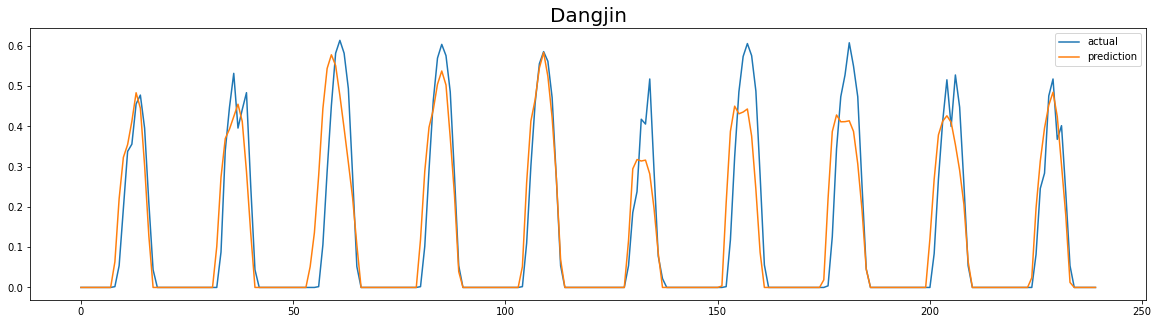

In [41]:
day = 50
day_range = 10

plt.figure(figsize=(20, 5))
plt.title('Dangjin', fontsize=20)
plt.plot(test_label[-day*24:-(day-day_range)*24], label = 'actual')
plt.plot(pred[-day*24:-(day-day_range)*24], label = 'prediction')
plt.legend()
plt.show()

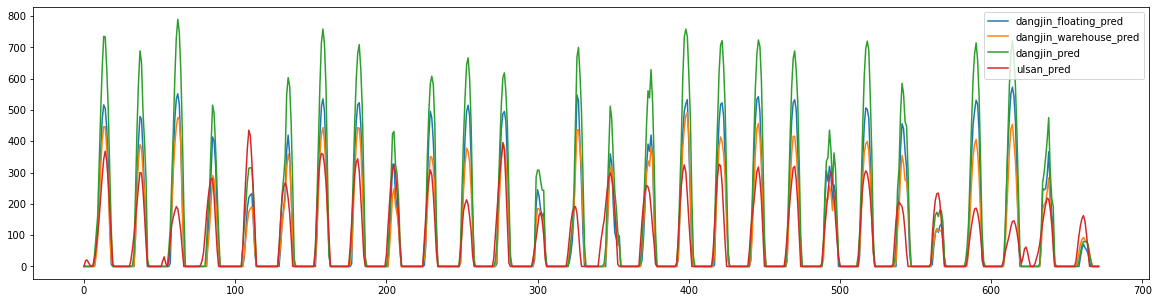

In [42]:
plt.figure(figsize=(20,5))
plt.plot(floating_pred * energy_floating.loc[0, 'capacity'], label = 'dangjin_floating_pred')
plt.plot(warehouse_pred * energy_warehouse.loc[0, 'capacity'], label = 'dangjin_warehouse_pred')
plt.plot(dangjin_pred * energy_dangjin.loc[0, 'capacity'], label = 'dangjin_pred')
plt.plot(ulsan_pred * energy_ulsan.loc[0, 'capacity'], label = 'ulsan_pred')
plt.legend()
plt.show()

In [43]:
submission = pd.read_csv('data/sample_submission.csv')

In [44]:
submission.iloc[:24*28, 1] = floating_pred * energy_floating.loc[0, 'capacity']
submission.iloc[:24*28, 2] = warehouse_pred * energy_warehouse.loc[0, 'capacity']
submission.iloc[:24*28, 3] = dangjin_pred * energy_dangjin.loc[0, 'capacity']
submission.iloc[:24*28, 4] = ulsan_pred * energy_ulsan.loc[0, 'capacity']

In [45]:
submission.to_csv('data/submission.csv', index=False)
submission.head(48)

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2021-02-01 01:00:00,0.000000,0.000000,0.000000,0.000000
1,2021-02-01 02:00:00,0.000000,0.000000,0.000000,18.263294
2,2021-02-01 03:00:00,0.000000,0.000000,0.000000,20.574532
3,2021-02-01 04:00:00,0.000000,0.000000,0.000000,11.630987
4,2021-02-01 05:00:00,0.000000,0.000000,0.000000,3.743974
5,2021-02-01 06:00:00,0.000000,0.000000,0.000000,0.000000
6,2021-02-01 07:00:00,0.000000,0.000000,0.000000,5.188441
7,2021-02-01 08:00:00,4.495859,0.000000,40.550060,25.525900
8,2021-02-01 09:00:00,59.715115,34.302410,100.916847,58.448097
9,2021-02-01 10:00:00,110.813194,86.483177,160.014954,104.464745


In [46]:
import pandas as pd
import numpy as np

def sola_nmae(answer_df, submission_df):
    submission = submission_df[submission_df['time'].isin(answer_df['time'])]
    submission.index = range(submission.shape[0])
    
    # 시간대별 총 발전량
    sum_submission = submission.iloc[:,1:].sum(axis=1)
    sum_answer = answer_df.iloc[:,1:].sum(axis=1)
    
    # 발전소 발전용량
    capacity = {
        'dangjin_floating':1000, # 당진수상태양광 발전용량
        'dangjin_warehouse':700, # 당진자재창고태양광 발전용량
        'dangjin':1000, # 당진태양광 발전용량
        'ulsan':500 # 울산태양광 발전용량
    }
    
    # 총 발전용량
    total_capacity = np.sum(list(capacity.values()))
    
    # 총 발전용량 절대오차
    absolute_error = (sum_answer - sum_submission).abs()
    
    # 발전용량으로 정규화
    absolute_error /= total_capacity
    
    # 총 발전용량의 10% 이상 발전한 데이터 인덱스 추출
    target_idx = sum_answer[sum_answer>=total_capacity*0.1].index
    
    # NMAE(%)
    nmae = 100 * absolute_error[target_idx].mean()
    
    return nmae